In [1]:
from transformers import BertTokenizer, BertModel, BertTokenizerFast, RobertaTokenizerFast



tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')
tokenizer_roberta_fast = RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True)

clean_sent = [word.strip('.,') for word in sent.lower().strip('.!').split(" ")]
input_cytokine = tokenizer_bert.batch_encode_plus(clean_sent, add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
output_cytokine = model_bert(**input_cytokine)

words = [x for x in sent.split(' ')]
enc = tokenizer_roberta_fast.batch_encode_plus(words, add_special_tokens=False)

NameError: name 'sent' is not defined

In [2]:
file = open("datasets/citation_intent/train.txt","r")
frequent_word = ""
frequency = 0 
words = []
 
# Traversing file line by line
for line in file:
     
    # splits each line into
    # words and removing spaces
    # and punctuations from the input
    line_word = line.lower().replace(',','').replace('.','').split(" "); 
     
    # Adding them to list words
    for w in line_word: 
        words.append(w); 
         
# Finding the max occurred word
for i in range(0, len(words)): 
     
    # Declaring count
    count = 1; 
     
    # Count each word in the file 
    for j in range(i+1, len(words)): 
        if(words[i] == words[j]): 
            count = count + 1; 
 
    # If the count value is more
    # than highest frequency then
    if(count > frequency): 
        frequency = count; 
        frequent_word = words[i]; 

print("Most repeated word: " + frequent_word)
print("Frequency: " + str(frequency))
file.close();

Most repeated word: 
Frequency: 5250


In [4]:
file = open("datasets/citation_intent/train.txt","r")
frequent_word = ""
frequency = 0 
words = {}
 
# Traversing file line by line
for line in file:

    line_word = line.lower().replace(',','').replace('.','').split(" "); 

    for w in line_word: 
        if w == '': continue
        if w in words:
            words[w] += 1
        else: words[w] = 1

In [9]:
for w in sorted(words, key=words.get, reverse=True):
    print(w, words[w])

( 3122
) 3109
and 2570
the 2363

 1622
of 1486
; 1385
al 1245
et 1242
a 1022
in 962
to 916
for 629
is 567
as 508
on 429
that 415
by 337
we 321
are 292
with 277
this 257
an 234
be 225
been 217
2001 211
2000 207
from 202
which 202
1998 200
has 199
or 197
1999 195
1997 184
have 180
2002 179
2005 176
1994 171
2004 167
2003 164
such 163
our 161
using 160
used 160
2007 159
work 158
[ 157
] 154
can 150
use 146
system 145
2008 145
it 141
: 138
2006 137
model 135
language 134
2009 131
information 120
1996 117
1993 117
grammar 116
translation 114
not 112
lexical 110
also 110
1995 108
learning 107
eg 105
more 105
other 105
`` 104
between 103
word 103
approach 102
corpus 100
systems 99
some 97
based 95
example 95
'' 93
semantic 93
2010 93
collins 92
most 91
text 91
1983 88
features 86
was 81
these 81
words 78
at 78
syntactic 76
one 76
â¢ 76
similar 75
models 75
set 74
approaches 73
1980 73
's 72
each 72
number 72
previous 71
results 70
structure 70
data 68
proposed 68
-- 67
2011 66
rules 66
1990 

In [1]:
file = open("datasets/chemprot/train.txt","r")
frequent_word = ""
frequency = 0 
words = {}
 
# Traversing file line by line
for line in file:

    line_word = line.lower().replace(',','').replace('.','').split(" "); 

    for w in line_word: 
        if w == '': continue
        if w in words:
            words[w] += 1
        else: words[w] = 1
        

        
for w in sorted(words, key=words.get, reverse=True):
    print(w, words[w])

the 5413
of 5383
and 5086
<< 3742
[[ 3634
>> 3544
]] 3100
in 2989
a 1718
to 1493
by 1451
that 1096
with 992
was 706
as 687
is 667
for 629
expression 593
inhibitor 549
acid 512
activity 502
inhibition 473
were 449
on 429
an 399
cells 398
]]
 394
or 384
([[ 370
inhibited 369
receptor 361
(<< 350
which 345
protein 343
at 339
kinase 329
>>) 317
increased 307
inhibitors 297
also 296
are 293
effects 291
we 283
human 280
]]) 274
from 273
induced 254
treatment 246
not 244
both 236
activation 232
these 229
inhibitory 227
but 218
this 206
increase 204
antagonist 203
selective 203
significantly 198
cells
 198
levels 194
effect 192
results 182
mrna 181
be 179
inhibits 177
signaling 177
showed 173
decreased 172
phosphorylation 168
its 166
enzyme 157
through 157
have 155
potent 151
their 149
via 147
cell 143
such 141
inhibit 141
than 141
has 141
reduced 141
may 140
no 138
factor 137
tumor 135
found 134
against 133
production 133
nuclear 133
study 129
microm) 129
synthase 129
well 125
receptors 122
a

In [2]:
import tqdm
from transformers import BertTokenizer, BertModel, BertTokenizerFast, RobertaModel, RobertaTokenizerFast
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

tokenizer_bert = BertTokenizerFast.from_pretrained("bert-base-uncased")
model_bert = BertModel.from_pretrained("bert-base-uncased")
tokenizer_roberta_fast = RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True)
model_roberta = RobertaModel.from_pretrained("roberta-base")

def get_seed_emb():
    # input_chem = self.dataOpts.tokenizer_bert('language', return_tensors="pt")
    input_chem = tokenizer_bert.batch_encode_plus(['language', 'text', 'model', 'information', 'grammar', 'lexical'], add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
    output_chem = model_bert(**input_chem)
    return output_chem

emb_chem = get_seed_emb()

def get_similarity(sents):
    clean_sent = [word.strip('.,') for sent in sents for word in sent.lower().strip('.!').split(" ")]
    input_cytokine = tokenizer_bert.batch_encode_plus(clean_sent, add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
    output_cytokine = model_bert(**input_cytokine)
    sim = []
    for idx in tqdm.tqdm(range(output_cytokine.pooler_output.shape[0])):
        if emb_chem.pooler_output.shape[0] > 1:
            temp_sim = -1000.00
            for sidx in range(emb_chem.pooler_output.shape[0]):
                tsim = torch.cosine_similarity(emb_chem.pooler_output[sidx][None], output_cytokine.pooler_output[idx][None]).detach().numpy()[0]
                if temp_sim < tsim:
                    temp_sim = tsim
            sim.append(temp_sim)
        else:
            sim.append(torch.cosine_similarity(emb_chem.pooler_output, output_cytokine.pooler_output[idx][None]).detach().numpy()[0])
    sim = np.array(sim)
    sim = np.divide(sim, (1.0+np.exp(-sim)))
    sim /= sim.sum()
    K = int(0.50*len(sim)) #int(0.15*len(sim))
    #indices = np.argpartition(sim,-K)[-K:]
    indices = (-sim).argsort()[:K]
    words = []
    for sent in sents:
        words.extend(sent.split(" "))
    sim_word = [words[idx] for idx in indices]
    return sim_word

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_he

In [3]:
import json
from collections import Counter, defaultdict
# docs = json.load(open('/work/sakter/AANG/datasets/chemprot/train.jsonl', 'r'))

with open('/work/sakter/AANG/datasets/citation_intent/train.txt', encoding="utf-8") as f:
    token_counter = Counter()
    lines = []
    all_tokens = []
    capitalizations = []
    for line in f.readlines():
        line = line.strip()
        if len(line) < 2: # Remove all single letter or empty lines
            continue
        lines.append(line)

In [4]:
all_sim_word = []
for i in range(0, len(lines), 50):
    # get the sublist of the next `n` elements
    sublist = lines[i:i+50]
    # do something with the sublist
    all_sim_word.extend(get_similarity(sublist))

100%|██████████| 1522/1522 [00:00<00:00, 2779.06it/s]


In [22]:
x = Counter(all_sim_word)
x.most_common()

[('of', 1486),
 ('a', 955),
 ('to', 889),
 ('in', 848),
 ('is', 567),
 ('for', 545),
 ('as', 480),
 ('on', 425),
 ('by', 336),
 ('are', 292),
 ('with', 270),
 ('we', 214),
 ('2001', 211),
 ('2000', 206),
 ('which', 202),
 ('1998', 200),
 ('has', 199),
 ('or', 197),
 ('1999', 195),
 ('from', 194),
 ('1997', 184),
 ('have', 180),
 ('2002', 179),
 ('2005', 176),
 ('2004', 167),
 ('2003', 164),
 ('this', 162),
 ('used', 160),
 ('2007', 159),
 ('work', 158),
 ('[', 157),
 ('use', 146),
 ('2008', 145),
 ('system', 143),
 ('2006', 137),
 ('2009', 131),
 ('model', 123),
 ('language', 119),
 ('1996', 117),
 ('1993', 117),
 ('In', 114),
 ('information', 111),
 ('translation', 110),
 ('We', 107),
 ('also', 105),
 ('e.g.', 103),
 ('learning', 103),
 ('approach', 102),
 ('word', 99),
 ('systems', 97),
 ('grammar', 95),
 ('This', 95),
 ('example', 95),
 ('corpus', 95),
 ('lexical', 94),
 ('2010', 93),
 ('Collins', 92),
 ('more', 91),
 ('semantic', 89),
 ('based', 89),
 ('1983', 88),
 ('text', 85),
 

In [61]:
x = dict(Counter(all_sim_word))

In [62]:
import json

with open('data_citation_intent.json', 'w') as fp:
    json.dump(x, fp)

In [51]:
stopwords = ['of','a','to','in','is','for','as','on','by','are','with','we', 'has', 'or', 'from', 'this', 'used', 'In', 'We', 
             'also', 'e.g.', 'at', 'A', 'some', 'which', '2001', '2000', '1998', '1999', 'have', '2002', '2005', '2004', '2003', '2007','work',
            '[', 'use', '2008', '2006', '2009','This', 'more', 'most','their', '1997', '1996', '1993', '2010','1988', 'For']
for item in stopwords:
    del x[item]

In [39]:
ls = sorted(x, key=x.get, reverse=True)
ls

['system',
 'model',
 'language',
 '1996',
 '1993',
 'information',
 'translation',
 'learning',
 'approach',
 'word',
 'systems',
 'grammar',
 'example',
 'corpus',
 'lexical',
 '2010',
 'Collins',
 'semantic',
 'based',
 '1983',
 'text',
 'For',
 'features',
 'set',
 'approaches',
 'other',
 'proposed',
 'models',
 'data',
 'rules',
 'training',
 '1991',
 'described',
 '2012',
 'methods',
 'previous',
 'structure',
 'method',
 'analysis',
 'research',
 'statistical',
 'feature',
 'only',
 '1988',
 'different',
 'algorithm',
 'syntactic',
 'â\x80¢',
 'into',
 'several',
 '1992',
 'parser',
 'see',
 '1987',
 'linguistic',
 'where',
 'recent',
 'knowledge',
 '1985',
 'techniques',
 'machine',
 'problem',
 'speech',
 'tasks',
 'many',
 'they',
 'evaluation',
 'document',
 'English',
 '1989',
 'using',
 'sentence',
 'dialogue',
 '1976',
 'documents',
 'resolution',
 '1',
 'Roth',
 '%',
 'Och',
 'tree',
 'terms',
 'NLP',
 'developed',
 'reported',
 'experiments',
 'parsers',
 'natural',
 '

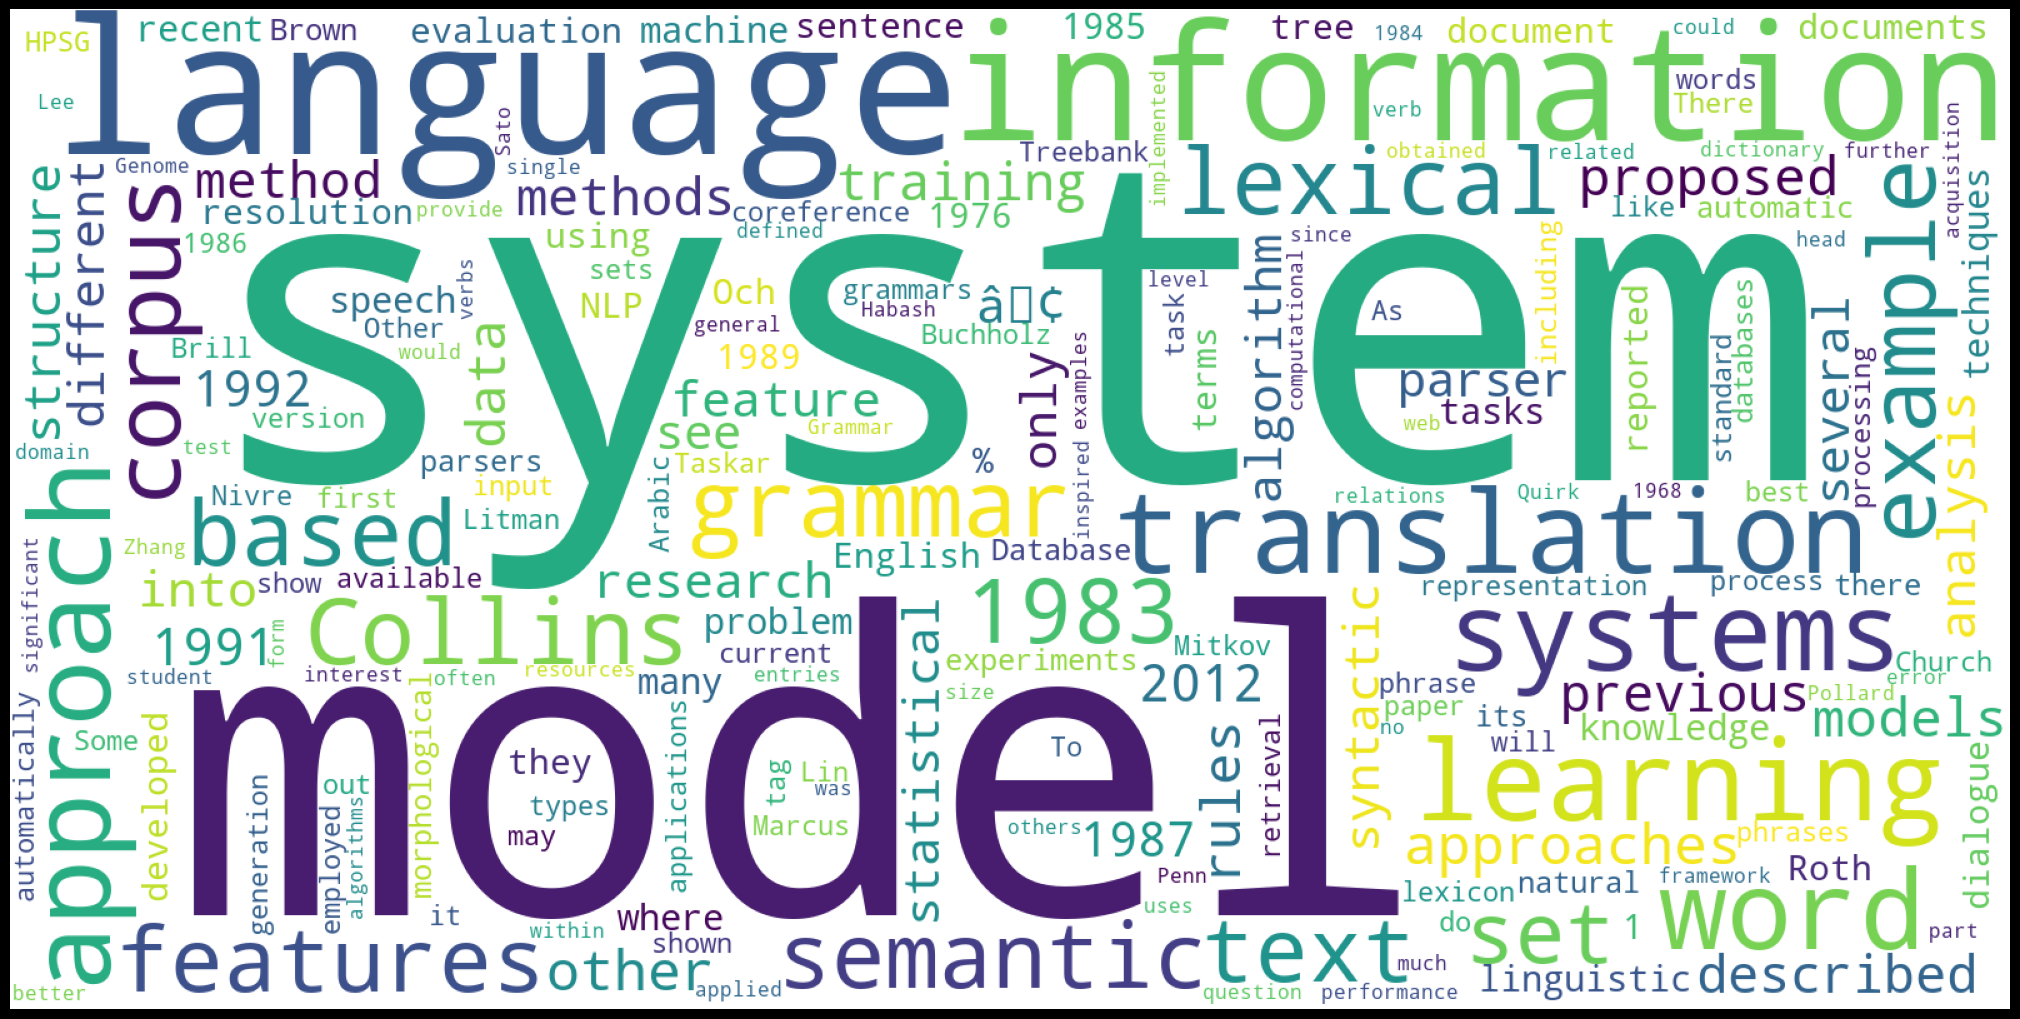

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# fig = plt.subplots(figsize=(24,20))
# wordcloud = WordCloud(background_color = 'white')
# wordcloud.generate_from_frequencies(frequencies=x)
# # plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.savefig('wc_citation_intent.png', bbox_inches='tight')
# plt.show()

wordcloud = WordCloud(width=1600, height=800, background_color = 'white')
# Open a plot of the generated image.
wordcloud.generate_from_frequencies(frequencies=x)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('wordcloud_citation_intent.png', facecolor='k', bbox_inches='tight')
plt.show()

In [8]:
x.most_common()

[('of', 1486),
 ('a', 955),
 ('to', 889),
 ('in', 848),
 ('is', 567),
 ('for', 545),
 ('as', 480),
 ('on', 425),
 ('by', 336),
 ('are', 292),
 ('with', 270),
 ('we', 214),
 ('2001', 211),
 ('2000', 206),
 ('which', 202),
 ('1998', 200),
 ('has', 199),
 ('or', 197),
 ('1999', 195),
 ('from', 194),
 ('1997', 184),
 ('have', 180),
 ('2002', 179),
 ('2005', 176),
 ('2004', 167),
 ('2003', 164),
 ('this', 162),
 ('used', 160),
 ('2007', 159),
 ('work', 158),
 ('[', 157),
 ('use', 146),
 ('2008', 145),
 ('system', 143),
 ('2006', 137),
 ('2009', 131),
 ('model', 123),
 ('language', 119),
 ('1996', 117),
 ('1993', 117),
 ('In', 114),
 ('information', 111),
 ('translation', 110),
 ('We', 107),
 ('also', 105),
 ('e.g.', 103),
 ('learning', 103),
 ('approach', 102),
 ('word', 99),
 ('systems', 97),
 ('grammar', 95),
 ('This', 95),
 ('example', 95),
 ('corpus', 95),
 ('lexical', 94),
 ('2010', 93),
 ('Collins', 92),
 ('more', 91),
 ('semantic', 89),
 ('based', 89),
 ('1983', 88),
 ('text', 85),
 

In [64]:
import json
    
with open('/work/sakter/AANG/datasets/chemprot/test.jsonl') as f:
    data = [json.loads(line) for line in f]

In [ ]:
for r in random_data:
    r['label']

In [70]:
import random
random_data = random.sample(data, k=50)
random_data

[{'text': 'However, << N-methyl-phosphatidylserine >>, which is transported by the plasma membrane [[ flippase ]] at a rate equivalent to PS, is incapable of activating Atp8a1 activity.',
  'label': 'SUBSTRATE',
  'metadata': []},
 {'text': "Wild-type enzymes and variants of CDA (<< Lys27Gln >> and Ala70Thr) and DCK (Ile24Val, Ala119Gly, and Pro122Ser) were expressed in and purified from Escherichia coli, and enzyme kinetic parameters were estimated for cytarabine (Ara-C), dFdC, and its metabolite [[ 2',2'-difluorodeoxyuridine ]] (dFdU) as substrates.",
  'label': 'SUBSTRATE',
  'metadata': []},
 {'text': 'We conclude that << cisapride >> is a potent blocker of [[ HERG ]] channels expressed in HEK293 cells.',
  'label': 'INHIBITOR',
  'metadata': []},
 {'text': 'Herein, we report the identification and characterization of << 3-(5-tert-butyl-isoxazol-3-yl)-2-[(3-chloro-phenyl)-hydrazono]-3-oxo-propionitrile >> (ESI-09), a novel noncyclic nucleotide EPAC antagonist that is capable of spe

In [ ]:
from matplotlib_venn_wordcloud import venn2_wordcloud
fig, ax = plt.subplots(figsize=(10,10))
# ax.set_title(‘Top 50 Cat and Dog Names in Seattle’, fontsize=20)
v = venn2_wordcloud([set(cat_t50[‘name’]), set(dog_t50[‘name’])],
                    ax=ax, set_labels=[‘Cats’, ‘Dogs’])
# add color
v.get_patch_by_id(‘10’).set_color(‘red’)
v.get_patch_by_id(‘10’).set_alpha(0.4)
v.get_patch_by_id(‘01’).set_color(‘blue’)
v.get_patch_by_id(‘01’).set_alpha(0.4)
v.get_patch_by_id(‘11’).set_color(‘purple’)
v.get_patch_by_id(‘11’).set_alpha(0.4)

In [6]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("d4data/biomedical-ner-all")
model = AutoModelForTokenClassification.from_pretrained("d4data/biomedical-ner-all")

pipe = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple") # pass device=0 if using gpu
output = pipe(["The patient reported no recurrence of palpitations at follow-up 6 months after the ablation.",
              ])


In [31]:
from Bio_Epidemiology_NER.bio_recognizer import ner_prediction

# returns the predicted class along with the probability of the actual EnvBert model
doc = """
	Conversely, opioid antagonists such as << naloxone >> and naltrexone (which bind to non-selectively [[ opioid receptors ]]) have been shown to decrease alcohol consumption under various experimental conditions.
      """

# returns a dataframe output
output = ner_prediction(corpus=doc, compute='gpu') #pass compute='gpu' if using gpu

/work/sakter/anaconda3/envs/aang/lib/python3.7/site-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


In [32]:
output

,entity_group,value,score
0,Medication,opioid opioid,0.998559
1,Medication,opioid opioid consumption various conditions,0.970113
2,Medication,opioid opioid antagonists,0.984852
3,Medication,naloxone naltrexone,0.997092
4,Medication,naltrexone,0.998818
5,Medication,naltrexone receptors decrease,0.998830
6,Lab_value,decrease,0.986147
7,Diagnostic_procedure,alcohol,0.747036


In [28]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("sschet/biobert_chemical_ner")

model = AutoModelForTokenClassification.from_pretrained("sschet/biobert_chemical_ner")

nerpipeline = pipeline('ner', model=model, tokenizer=tokenizer)

In [30]:
'selected seleted'.replace('sel', '%%%')

'%%%ected %%%eted'

In [14]:
import random

# Example list
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Number of elements to select
k = 3

# Randomly select k elements from the list
selected_elements = random.sample(my_list, k)

print("Selected elements:", selected_elements)

Selected elements: [9, 4, 8]


In [15]:
'selected'.split(' ')

['selected']

In [40]:
A = {'oopn': 2, 'ggve': 4, 'bbba': 3, 'aavvb': 1, 'tjjua': 0}
a = sorted(A.items(), key=lambda x: x[1])
slist = [x[0] for x in a]
slist

['tjjua', 'aavvb', 'oopn', 'bbba', 'ggve']

In [39]:
a

[('tjjua', 0), ('aavvb', 1), ('oopn', 2), ('bbba', 3), ('ggve', 4)]

In [76]:
import pandas as pd

data1 = pd.read_csv('/work/sakter/SelectiveMasking/data/datasets/yelp/train.csv', names=['score', 'comment'], header=None, index_col=False)
data2 = pd.read_csv('/work/sakter/SelectiveMasking/data/datasets/amazon/train.csv', names=['score', 'title', 'comment'], header=None, index_col=False)

In [77]:
data3 = pd.DataFrame(list(zip(data1['score'].tolist()+data2['score'].tolist(), data1['comment'].tolist()+data2['comment'].tolist())),
              columns=['score','comment'])

In [25]:
import json
L = []
labels = set()

with open('datasets/chemprot/train.jsonl', "r") as data_file:
    for line in data_file:
        items = json.loads(line)
        if "text" in items:
            text = items["text"]
        label = str(items.get('label'))
        L.append({"text": text, "labels": label})
        labels.add(label)

In [46]:
text = L[0]['text']
tokens_a = text.replace("<<", "#").replace(">>", "#").replace("[[", "$").replace("]]", "$")
l = len(tokens_a)
e11_p = tokens_a.index("#")+1   # the start position of entity1
e12_p = l-tokens_a[::-1].index("#")+1  # the end position ofentity1
e21_p = tokens_a.index("$")+1   # the start position ofentity2
# the end position of entity2
e22_p = l-tokens_a[::-1].index("$")+1

In [47]:
e11_p, e12_p, e21_p, e22_p

(1, 37, 107, 120)

In [45]:
x

'# Epidermal growth factor receptor # inhibitors currently under investigation include the small molecules $ gefitinib $ (Iressa, ZD1839) and erlotinib (Tarceva, OSI-774), as well as monoclonal antibodies such as cetuximab (IMC-225, Erbitux).'

In [12]:
L = []
with open('datasets/citation_intent/train.txt', "r") as data_file:
    for line in data_file:
        L.append(line)

In [13]:
len(L), L[1086]

(1688,
 'Xia ( 1999 ) also presents a similar method for the extraction of a TAG from the Penn Treebank .\n')

In [3]:
import numpy as np
arr = [0.829057, 0.833381, 0.837705, 0.8394]
np.std(arr)

0.004017624383575444

In [4]:
np.mean(arr)

0.83488575

In [5]:
arr2 = [0.773959, 0.740412, 0.710962]
np.std(arr2)

0.02573654064209527

In [6]:
np.mean(arr2)

0.7417776666666667

In [11]:
siq_arr_body = [0.7137, 0.6989]
np.std(siq_arr_body), np.mean(siq_arr_body)

(0.007400000000000018, 0.7062999999999999)

In [9]:
siq_arr_face = [0.6853, 0.6905]
np.std(siq_arr_face), np.mean(siq_arr_face)

(0.259999999999998, 68.78999999999999)

In [10]:
siq_arr_random = [0.6905, 0.6847]
np.std(siq_arr_random), np.mean(siq_arr_random)

(0.28999999999999915, 68.75999999999999)

In [14]:
import h5py
import numpy as np
f = h5py.File('/results/sakter/citation_intent/merged/all_train.hdf5', "r")

In [15]:
input_ids = np.asarray(f["input_ids"][:]).astype(np.int64)

In [16]:
f.keys()

<KeysViewHDF5 ['input_ids', 'input_mask', 'masked_lm_ids', 'masked_lm_positions', 'next_sentence_labels', 'segment_ids']>

In [17]:
len(input_ids)

1696

In [63]:
a

[0, 1, 2]